# Reducción de dimensionalidad - SVD

### 1. Ejemplo: compresión de una imagen

Vamos a empezar con un ejemplo simple, diferente a los que solemos utilizar. SVD puede ser usado en el contexto de imágenes para comprimir fotos. De esta forma, obtendrás una demostració "visual" del funcionamiento de SVS. En el notebook anterior viste que una imágen (en blanco y negro) es una matriz. Si en lugar de guardar la foto entera (Matriz M de la clase), uno guardase una representación reducida de esta matriz (B) y la manera de pasar de un espacio a otro (V*), entonces se podría ahorrar mucho espacio en el guardado de la foto. Este mismo proceso se utiliza a veces en imágenes y señales para reducir el ruido de las mismas (proceso llamado denoising).

El formalismo de SVD nos asegura que dado el rango que eligamos (r), la foto que podamos reconstruir a partir de B y V* (M moño) será la "mas parecida" posible a la foto original (M)

1. Primero cargamos la foto. Si no la tienen, deberán bajarse la libreria PIL para hacer este proceso mas fácil.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


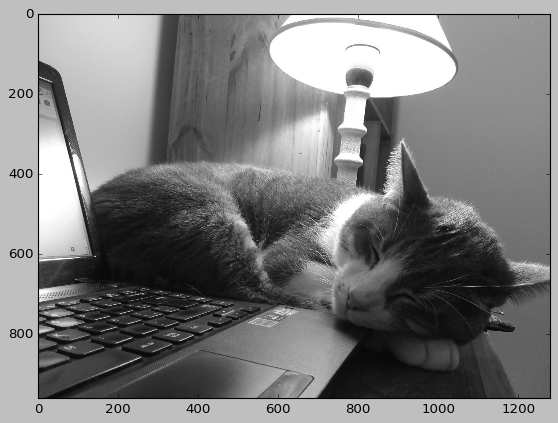

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('classic')
img = Image.open('/content/drive/MyDrive/Colab Notebooks/domo_dormido.jpeg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [5]:
imgmat.shape

(960, 1280)

2. Vamos a usar la versión clasica del algoritmo de SVD que viene en Numpy (noten que importante que es, que viene por default en Numpy, ya que se usa para muchas más cosas).

In [6]:
U, D, V = np.linalg.svd(imgmat)

3. Inspeccionemos la dimensión de los elementos:

In [7]:
imgmat.shape

(960, 1280)

In [8]:
U.shape

(960, 960)

In [9]:
D.shape

(960,)

In [10]:
V.shape

(1280, 1280)

4. Así como está, si multiplicamos adecuadamente estos tres elementos, recuperariamos la foto original. Veamos que si tomamos los 960 valores singulares tendremos la imagen original nuevamente:

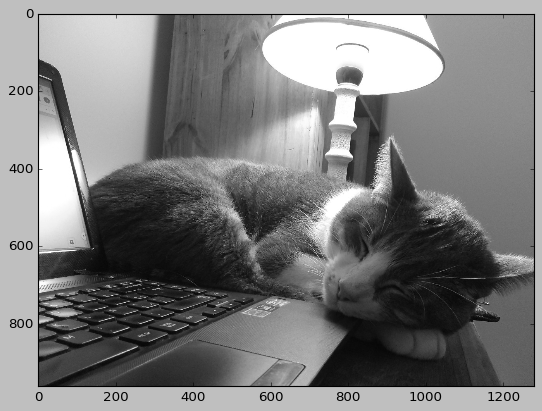

In [11]:
reconstimg = np.matrix(U[:, :imgmat.shape[0]]) * np.diag(D[:imgmat.shape[0]]) * np.matrix(V[:imgmat.shape[0], :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

5. El objetivo pasa por tomar unicamente los valores singulares más altos. Por una cuestión de comodidad, los valores en D (notar que representa una matriz diagonal pero viene en forma de vector!) ya están ordenados de menor a mayor, siendo los primeros los de mayor valor. Ahora sí, vamos a probar tomando menos valores singulares, empecemos por sólo 3.

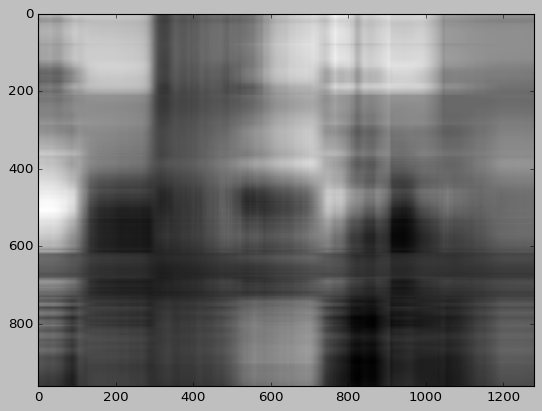

In [28]:
#truncamos la matriz diagonal hasta el tercer valor singular (diagonal 3)
reconstimg = np.matrix(U[:, :3]) * np.diag(D[:3]) * np.matrix(V[:3, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

6. No es muy sorprendente el resultado, pero ya se puede al menos ver que hay un objeto en el centro de la imagen. Para tener tan poca información (sólo los tres vectores propios asociados a los valores propios y los vectores propios) no está tan mal. Ahora si, barramos una cantidad más razonable de valores singulares, y observemos los resultados.

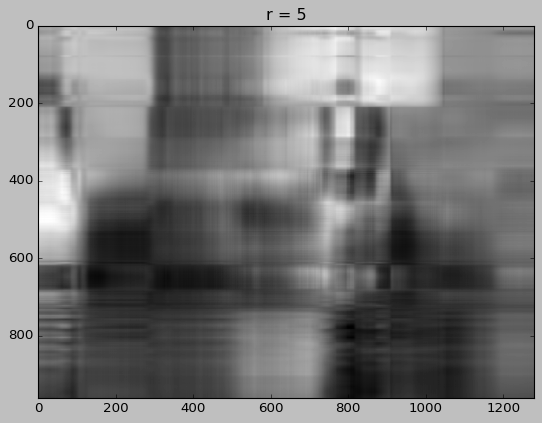

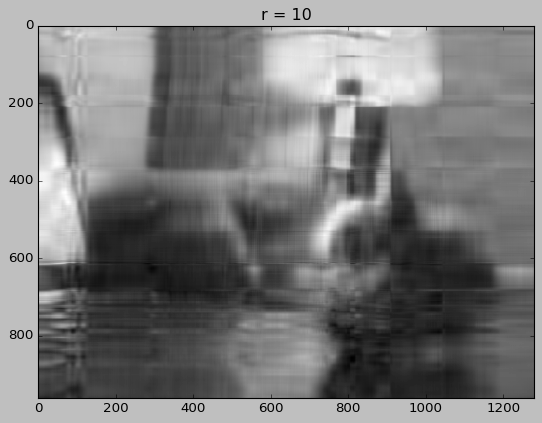

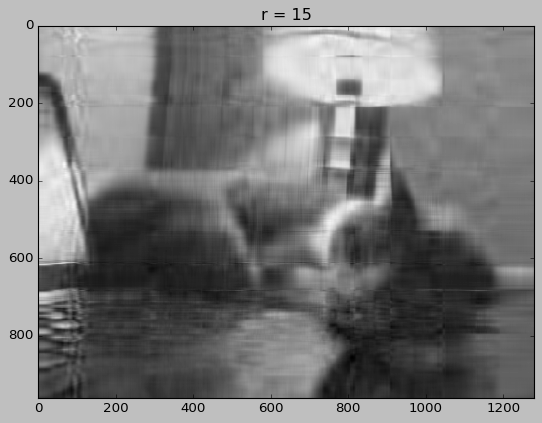

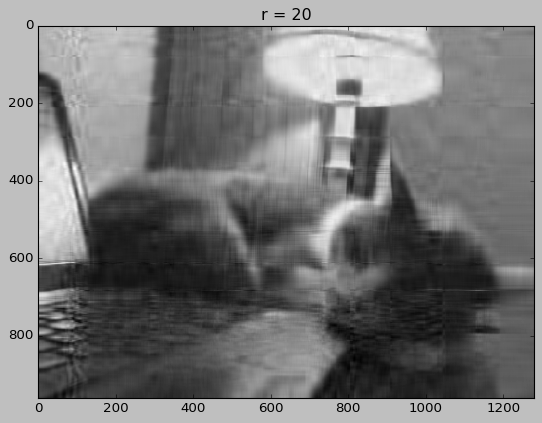

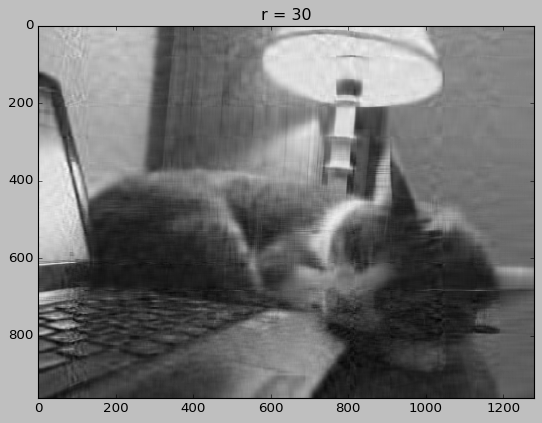

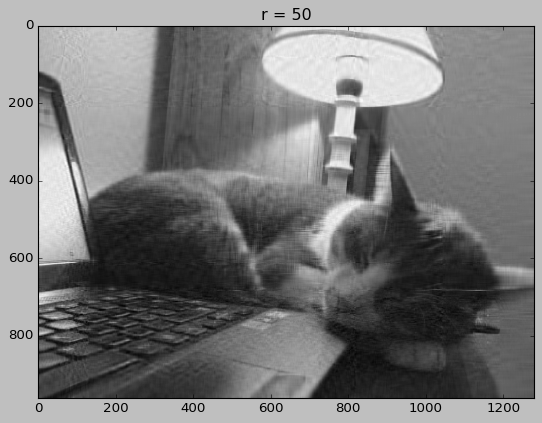

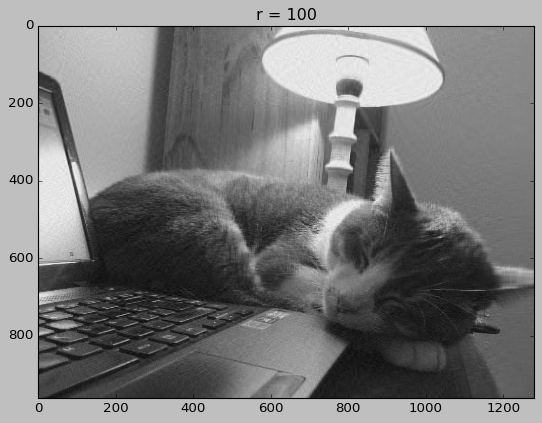

In [29]:
#el i es el r de valores con el que trunco (a mano)
for i in [5, 10, 15, 20, 30, 50,100]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "r = %s" % i
    plt.title(title)
    plt.show()
  #acá me quedo con Mmoño no la B. 
  #obs ya con truncar la matriz en 100 es muy similar a la original, entonces uno podría reducir el peso de la imagen así.

## 2. ¡A probar con un dataset!

Así como hiciste con Clustering, es momento de probar estas técnicas con un dataset de tu elección. Para hacerlo, te recomendamos que mires atentamente la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/decomposition.html) y que utilices una implementación de SVD de esa librería, preferiblemente [`TruncatedSVD`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). Es importante que mires la documentación de esa clase, en particular el ejemplo para comenzar. ¡Ya es hora de aprender solo/a cómo aplicar una herramienta nueva!

In [14]:
from sklearn.decomposition import TruncatedSVD

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=.05, random_state=0)
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42) 
#la cantidad de componentes es el r, cantidad de atributos con el que me quedo. siempre que r =< dimension del data set (las columnas)
svd.fit(X)
X_reducido=svd.transform(X)
print(svd.explained_variance_ratio_) #veo el peso relativo en cada valor singular.

print(svd.explained_variance_ratio_.sum()) #

print(svd.singular_values_)

[0.78559682]
0.7855968231039525
[31.80363465]


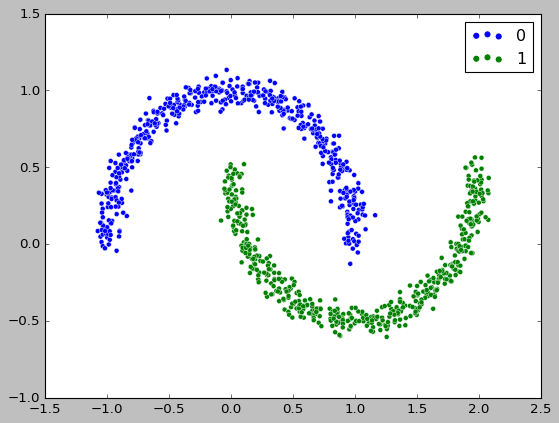

In [19]:
import seaborn as sns
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

In [24]:
print(X.shape)
print(X_reducido.shape)

(1000, 2)
(1000, 1)


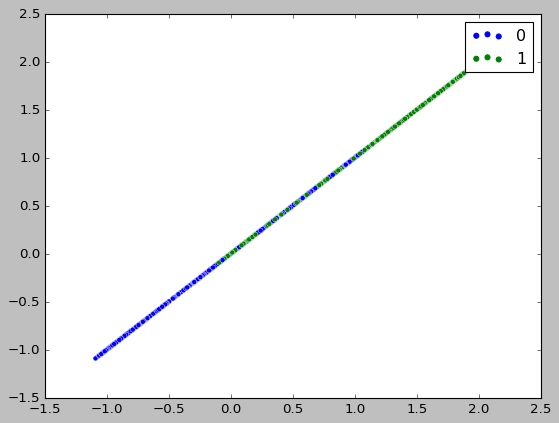

In [27]:
sns.scatterplot(x = X_reducido[:,0], y = X_reducido[:,0], hue = y)
plt.show()

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [65]:
features_mean = list(df.columns[0:3])
data = df[features_mean + ['target']]
X = data.drop(['target'],axis=1)
y = data['target']

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42) 
X_reduced = svd.fit_transform(X)


print(X.shape)
print(X_reduced.shape)

(569, 3)
(569, 2)


In [63]:
#la cantidad de componentes es el r, cantidad de atributos con el que me quedo. siempre que r =< dimension del data set (las columnas)

print(svd.explained_variance_ratio_) #Valor de la varianza explicada por cada vector singular. veo el peso relativo en cada valor singular.
print(svd.explained_variance_ratio_.sum()) #varianza total estimada
print(svd.singular_values_) #cuales son los valores singulares

[0.95625942 0.04361034]
0.9998697560578893
[1275.31609627   68.97851721]


TypeError: ignored

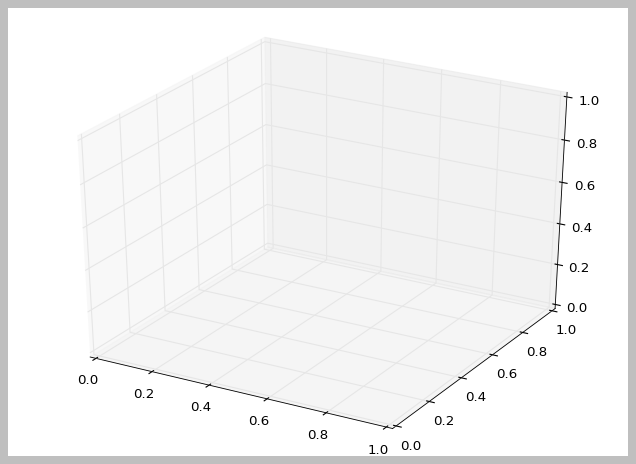

In [70]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 # Creating plot
ax.scatter(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("simple 3D scatter plot")
#show plot
plt.show()


plt.figure()
plt.scatter(X_reduced[:,0],X_reduced[:,1])
#copiar pregunta de estefi, ver como obtener los nuevos atributos obtenidos del svd usando la inversa

In [ ]:
#copiar pregunta de estefi, ver como obtener los nuevos atributos obtenidos del svd usando la inversa

In [ ]:
kmeans_iris = KMeans(n_clusters=3, random_state=0)
kmeans_iris = kmeans_iris.fit(X_reduced)
etiquetas_iris = kmeans_iris.labels_ # miramos las etiquetas que les puso
centros_iris = kmeans_iris.cluster_centers_ # centroides

sns.scatterplot(X_reduced[:,0], X_reduced[:,1], hue = etiquetas_iris)
sns.scatterplot(centros_iris[:, 0], centros_iris[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()
